<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Sigmoid_Neuron/Sigmoid_with_different_error_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
import matplotlib.patches as mpatches

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
my_file=pd.read_csv('/content/drive/My Drive/PadhAI (Download Materials)/mobile_cleaned-1551253091700.csv')

In [0]:
#let's create X and Y
X=my_file.drop('Rating',axis=1)
Y=my_file['Rating'].values #type is changed to array just for the sake of convenience

In [0]:
#alternative way of converting the true false to 1 and 0 respectively.
thld=4.2
my_file['class']=(my_file['Rating']>thld).astype(np.int)#here the true and false created by threshole value are converted to 1 and 0 respectively by converting there type as int.

In [0]:
Y_bin=my_file['class'].values

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_bin)

In [0]:
Scaler=StandardScaler()

In [0]:
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [0]:
min_max_scaler=MinMaxScaler()

In [0]:
Y_train_scaled=min_max_scaler.fit_transform(Y_train.reshape(-1,1))

In [0]:
Y_test_scaled=min_max_scaler.transform(Y_test.reshape(-1,1))

In [0]:
thld_scaled=min_max_scaler.transform(np.asarray([thld]).reshape(-1,1))[0][0]

In [0]:
Y_bin_train=(Y_train_scaled > thld_scaled).astype(np.int).ravel()#np.ravel() is used to flaten the np array created.

In [0]:
Y_bin_test=(Y_test_scaled > thld_scaled).astype(np.int).ravel()

In [0]:
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook  #to show a progress bar

In [0]:
class Sigmoid_Neuron_3:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b #we have taken the dot product of transpose of Weight matrix and the input vector just to avoid any size mismatch
  
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  
  def error(self,X,Y):
    err=0
    # err +=0.5*((self.predict(X)-Y)**2)
    for x,y in zip(X,Y):
      err += 0.5*((self.sigmoid(self.perceptron(x))-y))**2
    return err


  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,Y_bin_train,epochs=1,lr_rate=1,initialize=True, display_loss=False,show_accuracy=False,thld=0):
    if initialize:    #if initialization is required then we will proceed for this otherwise we will proceed with the previous value of w and b
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
      

      if display_loss:
        loss=[]
        loss_1=[]
        accuracy_train=[]
        
        

 
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      Y_train_pred=[]
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

        if show_accuracy:
          y_pred=self.sigmoid(self.perceptron(x))
          if y_pred>thld:
            y_train_pred_bin=1
          if y_pred<=thld:
            y_train_pred_bin=0
          Y_train_pred.append(y_train_pred_bin)
     
      accuracy_train.append(accuracy_score(Y_bin_train,Y_train_pred))

      self.w -=lr_rate*dw
      self.b -=lr_rate*db
      loss_1.append(self.error(X,Y))




      if display_loss:
        y_pred=self.sigmoid(self.perceptron(x))
        loss.append(mean_squared_error(y_pred,y))
       

  
        
    if display_loss:
      plt.figure(1)
      blue_patch = mpatches.Patch(color='blue', label='loss')
      red_patch = mpatches.Patch(color='brown', label='accuracy')
      plt.legend(handles=[blue_patch])
      plt.plot(np.array(loss),'b-')
      # plt.plot(np.asarray(accuracy_train),'r-')
      # plt.plot(np.asarray(loss_1),'g-')
      plt.xlabel('epochs')
      plt.ylabel('mean_squared_error')
      plt.show()

      plt.figure(2)
      green_patch = mpatches.Patch(color='green', label='squared_error_loss')
      plt.legend(handles=[green_patch])
      plt.plot(np.asarray(loss_1),'g-')
      plt.show()

      plt.figure(3)
      red_patch = mpatches.Patch(color='brown', label='accuracy')
      plt.legend(handles=[red_patch])
      plt.plot(np.asarray(accuracy_train),'r-')
      plt.show()
    
   

In [0]:
sn_3=Sigmoid_Neuron_3()

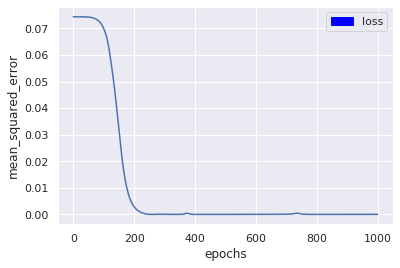

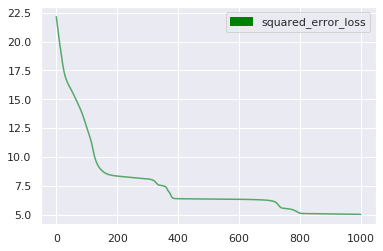

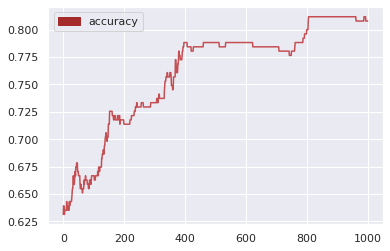

In [21]:
sn_3.fit(X_train_scaled,Y_train_scaled,Y_bin_train,thld=0.68,epochs=1000,lr_rate=0.01,display_loss=True,show_accuracy=True)